# Машинное обучение, DS-поток
## Задание ML.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

In [95]:
# Bot check

# HW_ID: ds_ml1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from sklearn.base import BaseEstimator

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

Вспомним постановку задачи Ridge-Regression : 

$$ \mathcal{L}(\theta) = \|X\theta - y\|_2^2 + \lambda\|\theta\|_2^2 \rightarrow min$$

Проксимальный оператор для выпуклой функции $g_{\eta}(\theta)$ с параметром $\eta$ определяется как решение следующей задачи : 

$$\mathcal{Pr}_{g,\eta}(u) = \arg\min_{\theta}(g(\theta) + \frac{1}{2\eta}\|\theta - u\|^2)$$
В нашем случае фунция $g(\theta) = \lambda\|\theta\|^2$, таким образрм , проксимальный оператор в Ridge-Regression будет иметь следующий вид: 
$$\mathcal{Pr}_{\lambda\|\theta\|_2^2,\eta}(u) = \arg\min_{\theta}( \lambda\|\theta\|_2^2 + \frac{1}{2\eta}\|\theta - u\|^2)$$

**Вывод проксимального оператора**

Рассмотрим функцию, которую мы минимизируем: 
$$f(\theta) = \lambda\|\theta\|_2^2 + \frac{1}{2\eta}\|\theta - u\|^2 = = \lambda \langle \theta, \theta \rangle + \frac{1}{2\eta} \langle \theta - u, \theta - u \rangle$$

Найдем ее дифференгциал : 
$$df = 2\lambda\langle\theta, d\theta \rangle + \frac1\eta \langle  \theta - u,  d\theta\rangle = \langle2\lambda\theta +  \frac1\eta(\theta - u), d\theta\rangle = \langle\nabla f, d\theta \rangle $$
Откуда получавем занчение градиента и приравниваем его к нулю и получаем значение $\theta$:

$$\nabla f = 2\lambda\theta +  \frac1\eta(\theta - u)  = 0$$
$$\theta = \frac{u}{1 + 2\lambda \eta}$$

Теперь, выпиши формулу для шага регрессии : 

$$\theta^{(k + 1)} = \mathcal{Pr}_{\eta, \lambda, \|\theta\|_2^2}(\theta^{(k)} - \eta \nabla \mathcal{L}(\theta^{(k)})) = \frac{\theta^{(k)} - \eta(X^T(X\theta^{(k)} - y))}{1 + 2\lambda\eta} $$

**Что можно сказать о параметре регулярезации :**

Меньшие значения $\lambda$ позволяют лучше аппроксимировать данные, но могут привести к переобучению, так как модель начнёт чрезмерно подстраиваться под шум в данных. Слишком большие значения могут привести к недообучению, так как модель будет слишком ограничена, чтобы точно предсказать значения целевой переменной.

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Рассмотрим постановку задачи : 
$$\min_{\theta} \left\{ \|X\theta - y\|_2^2 + \lambda_1\|\theta\|_2^2 + \lambda_2\|\theta\|_1 \right\}$$

Как видно, из-за $l_1$ регуляризации функция перестает быть дифференцируемой, поэтому, разобьем ее на гладкую и негладкую части : 

1) Smooth : $\mathcal{L}(\theta) = \|X\theta - y\|_2^2 + \lambda_1\|\theta\|_2^2$
2) Non-Smooth : $ \lambda_2\|\theta\|_1$

Градиент гладкой части : $\nabla\mathcal{L}(\theta) = X^T(X\theta - y) + \lambda_1\theta$

Проксимальный оператор для $L_1$ регулеризации определим следуюшим образом : 

$$\mathcal{Pr}_{\|\cdot\|_1,\eta, \lambda_1}(u) = \mathcal{sign}(u)\max \{|\eta\lambda| - 1, 0\}, \ \ u = \theta^{(k)} - \eta\nabla\mathcal{L}(\theta^{(k)})$$

Так как вся наша функция, которую мф оптимизируем разбивается на гладко-выпуклую и выпуклую части, поэтому сначала при помощи градиентного спуска мы оптимизируем  гладко-выпуклую часть ($MSE + L_2$), а после используем проксимальный оператор для оптимизации выпуклую части($L_1$)

Таким образом итерационная формула пересчета коэффициентов модели имеет следующий вид :

$$u^{(k+1)} = \theta^{(k)} - \eta \left(X^T (X \theta^{(k)} - y) + \lambda_1 \theta^{(k)} \right)$$
$$\theta^{(k+1)} = \text{sign}(u^{(k+1)}) \cdot \max \left( |u^{(k+1)}| - \eta \lambda_2, 0 \right) = \text{sign}( \theta^{(k)} - \eta \left(X^T (X \theta^{(k)} - y) + \lambda_1 \theta^{(k)} \right)) \cdot \max \left( | \theta^{(k)} - \eta \left(X^T (X \theta^{(k)} - y) + \lambda_1 \theta^{(k)} \right)| - \eta \lambda_2, 0 \right)$$



Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

1) увеличивает $\lambda_2$ влияние $l_1$-регуляризации. Это заставляет модель обнулять некоторые коэффициенты ,
что делает модель разреженной (многие коэффициенты становятся равными нулю).

2) При больших значениях $\lambda_2$ ElasticNet начинает вести себя как Lasso-регрессия, сильно уменьшая количество активных признаков (с ненулевыми коэффициентами).

3) Увеличение $\lambda_1$ увеличивает вклад $l_2$-регуляризации. Это способствует уменьшению значений всех коэффициентов $\theta$ но без обнуления

4) Если $\lambda_1 = 0$ , модель становится ближе к Lasso-регрессии, где происходит обнуление некоторых коэффициентов.


**3.** Выпишите формулы для градиентного и стохастического спуска

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [122]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]

data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [123]:
X, y = data[['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index','Restaurant Price Index','Local Purchasing Power Index']], data["Groceries Index"]

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [124]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** масштабу признаков, так как регуляризация накладывает ограничения на коэффициенты модели. Поэтому важно стандартизировать данные, чтобы все признаки имели одинаковый масштаб, иначе если по абсолютному значению какой-то признак будет сильно превыщпть другой, то коэфицинет при нем будет очени сильно уменьшен, что может некорректно отразиться результате

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

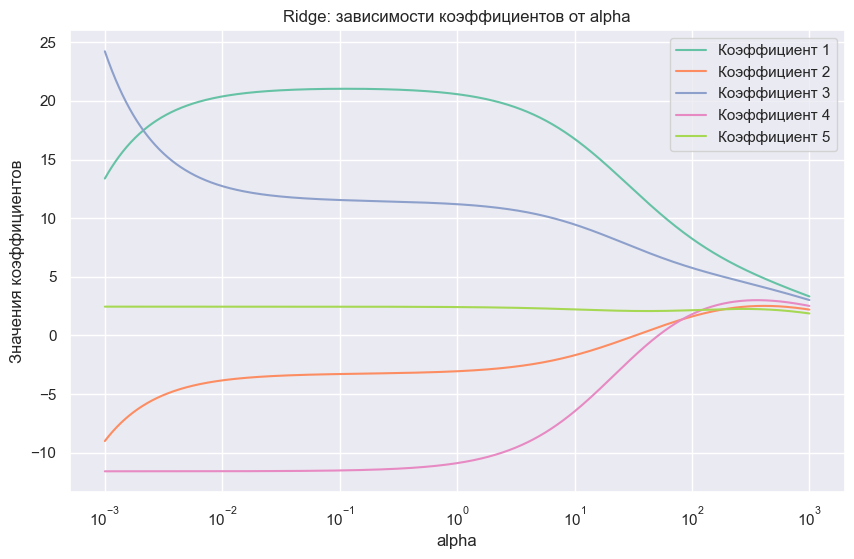

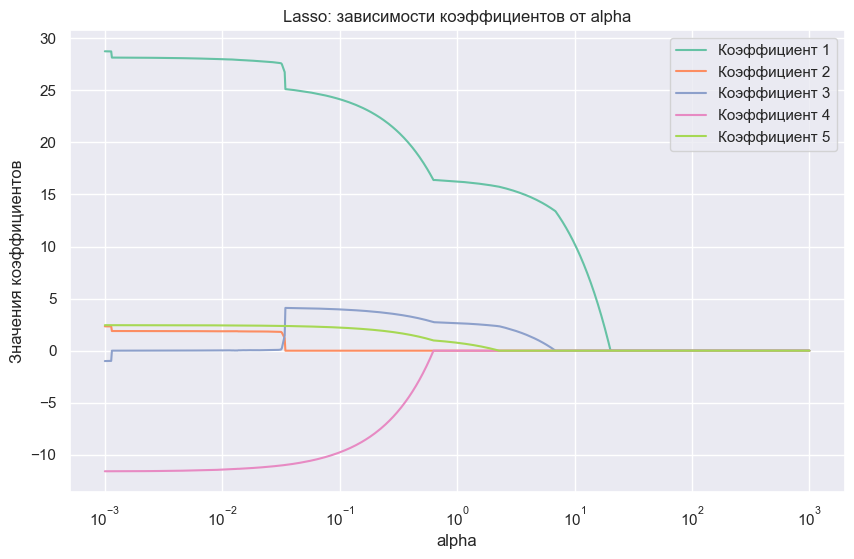

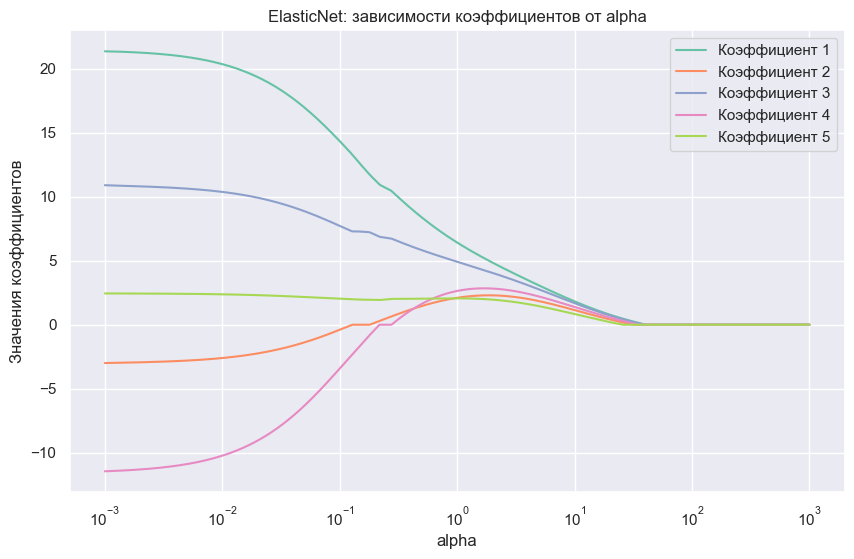

In [102]:
# Диапазон значений alpha
alphas = np.logspace(-3, 3, 1000)

def plot_coefficients_vs_alpha(model, X_train_scaled, y_train, alphas, title):
    coefficients = []
    
    for alpha in alphas:
        reg = model(alpha=alpha, max_iter=10000)
        reg.fit(X_train_scaled, y_train)
        coefficients.append(reg.coef_)
    
    coefficients = np.array(coefficients)
    plt.figure(figsize=(10, 6))
    for i in range(coefficients.shape[1]):
        plt.plot(alphas, coefficients[:, i], label=f'Коэффициент {i+1}')
    
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('Значения коэффициентов')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_coefficients_vs_alpha(Ridge, X_train_scaled, y_train, alphas, 'Ridge: зависимости коэффициентов от alpha')
plot_coefficients_vs_alpha(Lasso, X_train_scaled, y_train, alphas, 'Lasso: зависимости коэффициентов от alpha')
plot_coefficients_vs_alpha(ElasticNet, X_train_scaled, y_train, alphas, 'ElasticNet: зависимости коэффициентов от alpha')


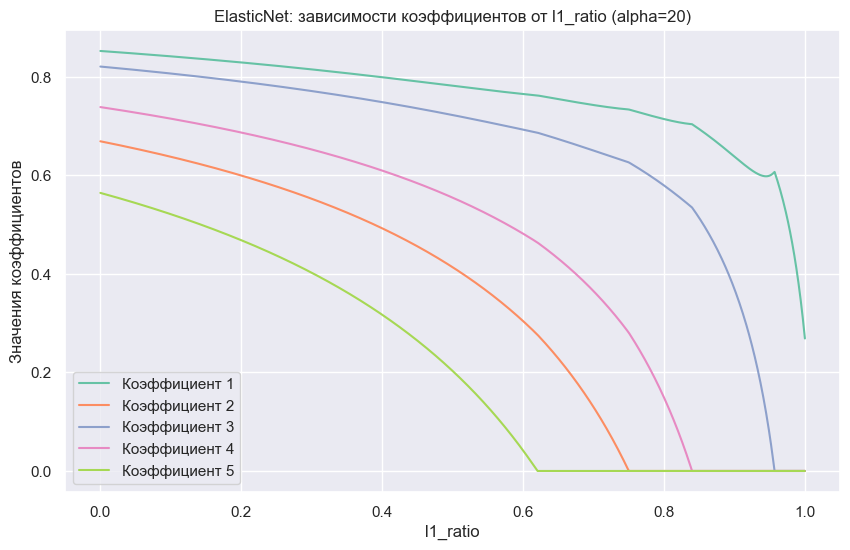

In [103]:
def plot_coefficients_vs_l1_ratio(X_train_scaled, y_train, l1_ratios, alpha_fixed=1):
    coefficients = []
    for l1_ratio in l1_ratios:
        reg = ElasticNet(alpha=alpha_fixed, l1_ratio=l1_ratio,max_iter=100000)
        reg.fit(X_train_scaled, y_train)
        coefficients.append(reg.coef_)
    
    coefficients = np.array(coefficients)
    plt.figure(figsize=(10, 6))
    for i in range(coefficients.shape[1]):
        plt.plot(l1_ratios, coefficients[:, i], label=f'Коэффициент {i+1}')
    plt.xlabel('l1_ratio')
    plt.ylabel('Значения коэффициентов')
    plt.title(f'ElasticNet: зависимости коэффициентов от l1_ratio (alpha={alpha_fixed})')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_coefficients_vs_l1_ratio(X_train_scaled, y_train, np.linspace(0, 1, 1000), alpha_fixed=20)


Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [104]:
condition_number =  np.linalg.cond(X_train_scaled)
print(f'Индекс обусловленности для МНК: {condition_number}')

Индекс обусловленности для МНК: 13000.164520116128


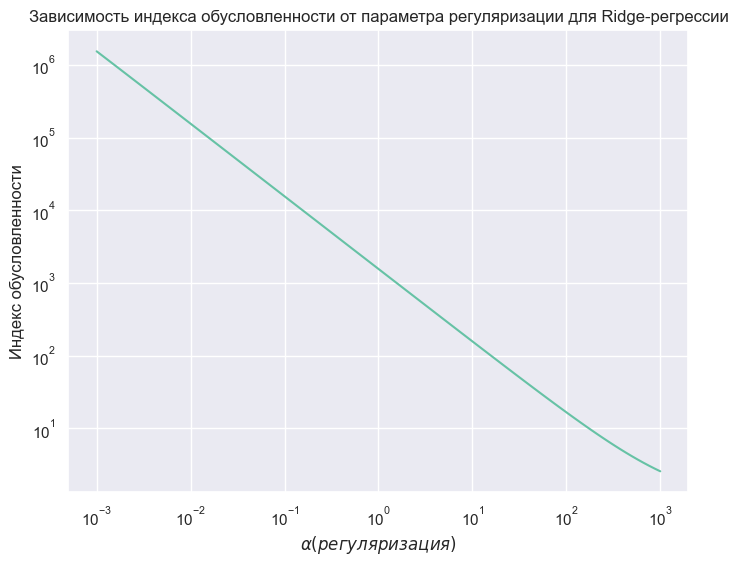

In [127]:
condition_numbers = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    condition_numbers.append(np.linalg.cond(np.dot(X_train_scaled.T, X_train_scaled) + alpha * np.eye(X_train_scaled.shape[1])))

plt.figure(figsize=(8, 6))
plt.plot(alphas, condition_numbers)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\alpha (регуляризация)$')
plt.ylabel('Индекс обусловленности')
plt.title('Зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии')
plt.grid(True)
plt.show()

Так как индекс обусловлденности > 1000, значит данные сильно мультиколлинеарны

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

In [106]:
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

alphas = np.logspace(-3, 3, 100)
ridge_params = {'regressor__alpha': alphas}
lasso_params = {'regressor__alpha': alphas}
elastic_params = {
    'regressor__alpha': alphas,
    'regressor__l1_ratio': np.linspace(0, 1, 100)
}

In [ ]:
ridge_model = create_pipeline(Ridge())
lasso_model = create_pipeline(Lasso(max_iter=1000))
elastic_model = create_pipeline(ElasticNet(max_iter=1000))

ridge_search = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_search = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
elastic_search = GridSearchCV(elastic_model, elastic_params, cv=5, scoring='neg_mean_squared_error')

ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)
elastic_search.fit(X_train, y_train)

In [108]:
print(f'Лучшие параметры для Ridge: {ridge_search.best_params_}')
print(f'Лучшие параметры для Lasso: {lasso_search.best_params_}')
print(f'Лучшие параметры для ElasticNet: {elastic_search.best_params_}')

print(f'Лучший MSE для Ridge: {-ridge_search.best_score_}')
print(f'Лучший MSE для Lasso: {-lasso_search.best_score_}')
print(f'Лучший MSE для ElasticNet: {-elastic_search.best_score_}')


Лучшие параметры для Ridge: {'regressor__alpha': 0.6135907273413176}
Лучшие параметры для Lasso: {'regressor__alpha': 0.024770763559917114}
Лучшие параметры для ElasticNet: {'regressor__alpha': 0.01873817422860384, 'regressor__l1_ratio': 0.9494949494949496}
Лучший MSE для Ridge: 34.921144929137085
Лучший MSE для Lasso: 34.93429253292211
Лучший MSE для ElasticNet: 34.90655156170725


На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [109]:
ridge = Ridge(alpha=0.6135907273413176)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)

lasso = Lasso(alpha=0.024770763559917114)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)

elastic_net = ElasticNet(alpha=0.01873817422860384, l1_ratio=0.9494949494949496)
elastic_net.fit(X_train, y_train)
elastic_net_preds = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_preds)

In [110]:
print(f"Ridge MSE: {ridge_mse}")
print(f"Lasso MSE: {lasso_mse}")
print(f"ElasticNet MSE: {elastic_net_mse}")

mse_results = {
    'Ridge': ridge_mse,
    'Lasso': lasso_mse,
    'ElasticNet': elastic_net_mse
}

best_model = min(mse_results, key=mse_results.get)
print(f"Лучшая модель: {best_model}")

Ridge MSE: 33.47423322008233
Lasso MSE: 33.473520166843976
ElasticNet MSE: 33.472878216636
Лучшая модель: ElasticNet


**4.** Сделайте общий вывод по задаче.

**Вывод:** <...>

---
## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| < c\} + c (|x| - \frac{c}{2})I\{|x| > c\}$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

Рассмотрим 2 случая рассчета градиента функция потерь Хьюбера: 

1) Если $|x| < c$ тогда : 
$$\nabla_1R(x) = x$$

1) Если $|x| > c$ тогда : 
$$\nabla_2R(x) = c\cdot sign(x)$$

Таким образом, градиент функции потерь Хьюбера для параметров $\theta$ имеет вид:
$$\nabla_\theta \sum_{i=1}^n R(Y_i - x_i^T \theta) = \sum_{i=1}^n \left[ \frac{|Y_i - x_i^T \theta|}{Y_i - x_i^T \theta} \cdot I\{|Y_i - x_i^T \theta| \geq c\} + I\{|Y_i - x_i^T \theta| < c\} \cdot (Y_i - x_i^T \theta) \right] \cdot (-x_i)
$$
Преобразуем : 
$$\nabla_\theta \sum_{i=1}^n R(Y_i - x_i^T \theta) = -\sum_{i=1}^n \left[ sign(Y_i - x_i^T \theta) \cdot I\{|Y_i - x_i^T \theta| \geq c\} + I\{|Y_i - x_i^T \theta| < c\} \cdot (Y_i - x_i^T \theta) \right] \cdot x_i
$$

Тогда формула градиентного шага выглядит следующим образом : 

$$\theta^{(k + 1)} := \theta^{k} - \eta \nabla_{\theta^{(k)}} \sum_{i=1}^n R(Y_i - x_i^T \theta^{(k)})$$


Преимущество функции потерь Хьюбера в том, что с при помощи ее параметризации(константы с) должна быть чувствительна к выбросам, так как при $|x| > c$ она ведет себя как MAE, что уменьшает влияние выбросов, а $|x| < c$ она ведет себя как MSE 

**2.** Реализуем теперь класс

In [111]:
from sklearn.base import BaseEstimator
import numpy as np

class HuberRegression(BaseEstimator):
    '''
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    '''
    
    def __init__(self, c=1, fit_intercept=True, max_iter=100, learning_rate=0.01):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        :param learning_rate: скорость обучения
        '''
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.theta = None
    
    def _huber_loss_gradient(self, X, y, theta):
        '''
        Вычисление градиента функции потерь Хьюбера для данного набора данных.
        
        :param X: матрица признаков
        :param y: вектор целевой переменной
        :param theta: вектор параметров
        :return grad: градиент по theta
        '''
        residuals = y - X.dot(theta)
        grad = np.zeros_like(theta)

        for i, r in enumerate(residuals):
            if np.abs(r) <= self.c:
                grad += -X[i] * r
            else:
                grad += -X[i] * self.c * np.sign(r)
        
        return grad / len(X)
    
    def fit(self, X, y):
        '''
        Обучение модели на данных X и y.
        
        :param X: матрица признаков
        :param y: значения целевой переменной
        :return: self
        '''
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.max_iter):
            grad = self._huber_loss_gradient(X, y, self.theta)
            self.theta -= self.learning_rate * grad
        return self
        
    def predict(self, X):
        '''
        Прогнозирование значений отклика для данных X.
        
        :param X: матрица признаков
        :return pred: предсказания
        '''
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]

        pred = X.dot(self.theta)
        return pred


**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [135]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data.drop('target', axis=1, errors='ignore')

Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

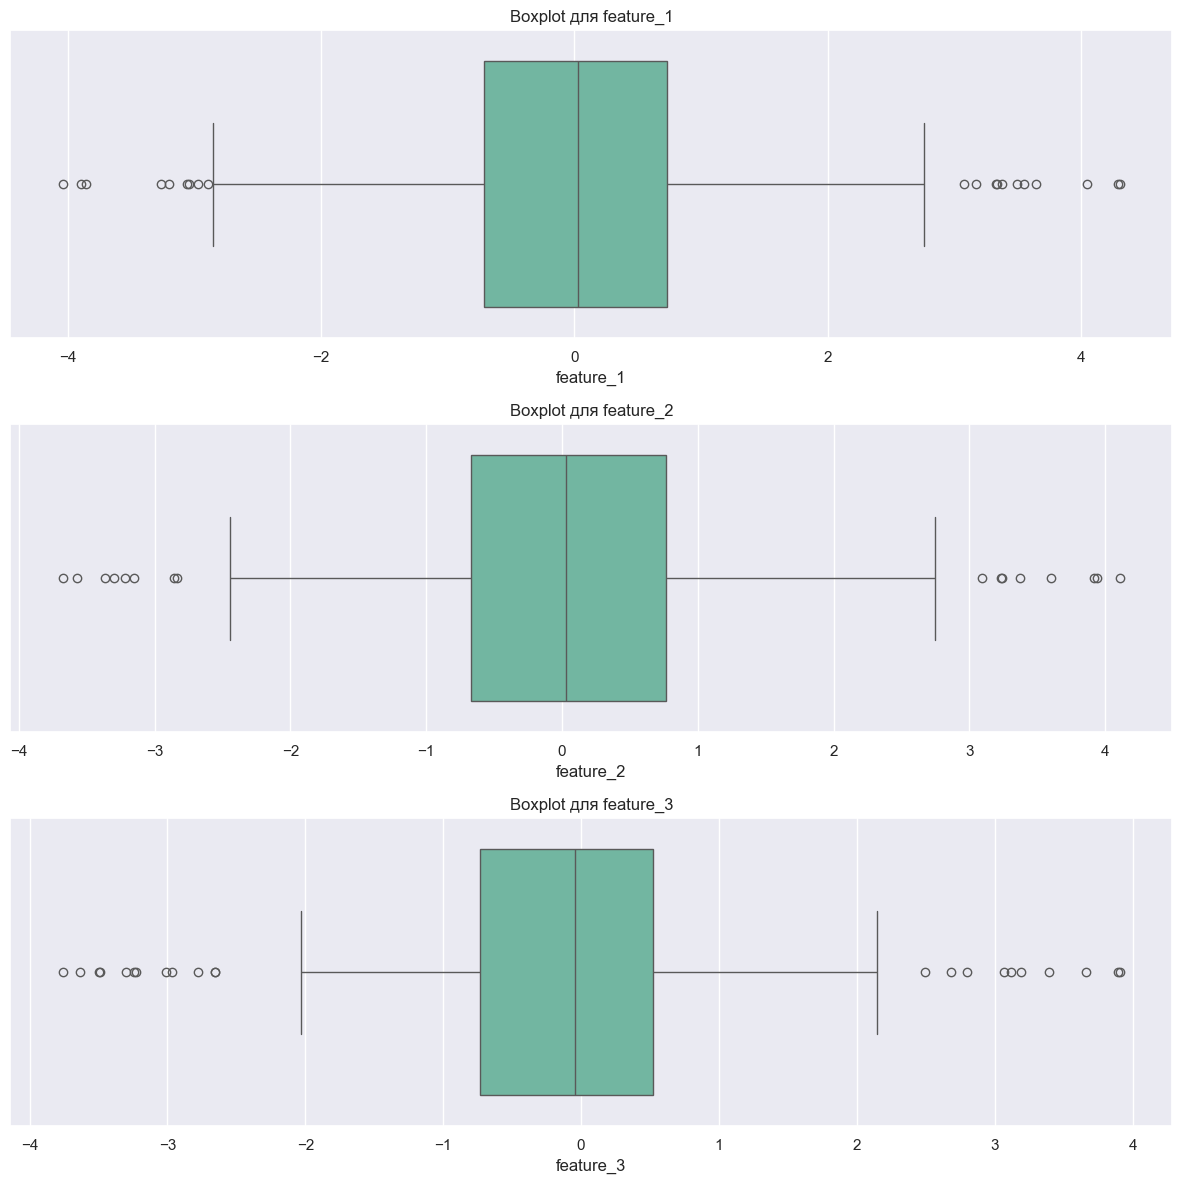

In [113]:
features = train_data.drop('target', axis=1).columns
target = 'target'

plt.figure(figsize=(12, len(features) * 4))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=train_data[feature], orient='h')
    plt.title(f'Boxplot для {feature}')

plt.tight_layout()
plt.show()

**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(test_data['target'], y_test_pred)
print(f'MSE на тестовой выборке: {test_mse}')

MSE на тестовой выборке: 17025.806610128933


**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

In [116]:
model = HuberRegression()
model.fit(X_train, y_train)

HuberRegression()

In [117]:
y_pred_hubert = model.predict(X_test)
test_mse = mean_squared_error(test_data['target'], y_pred_hubert)
print(f'MSE на тестовой выборке в регрессии Хьюбера: {test_mse}')

MSE на тестовой выборке в регрессии Хьюбера: 16220.001945630496


**6.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

Стоит испольщовать MAE так как она менее чевствительна к выбросам

In [140]:
huber_model = HuberRegression(fit_intercept=True)
grid_search = GridSearchCV(huber_model, {'c': np.logspace(0,5, 100)}, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_c = grid_search.best_params_['c']
print(f'Лучшее значение гиперпараметра c: {best_c}')

Лучшее значение гиперпараметра c: 117.68119524349979


**7.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?.

In [159]:
Lin = LinearRegression()
Lin.fit(X_train, y_train)
lin_pred = Lin.predict(X_train)

Best_Huber = grid_search.best_estimator_
huber_pred = Best_Huber.predict(X_train)

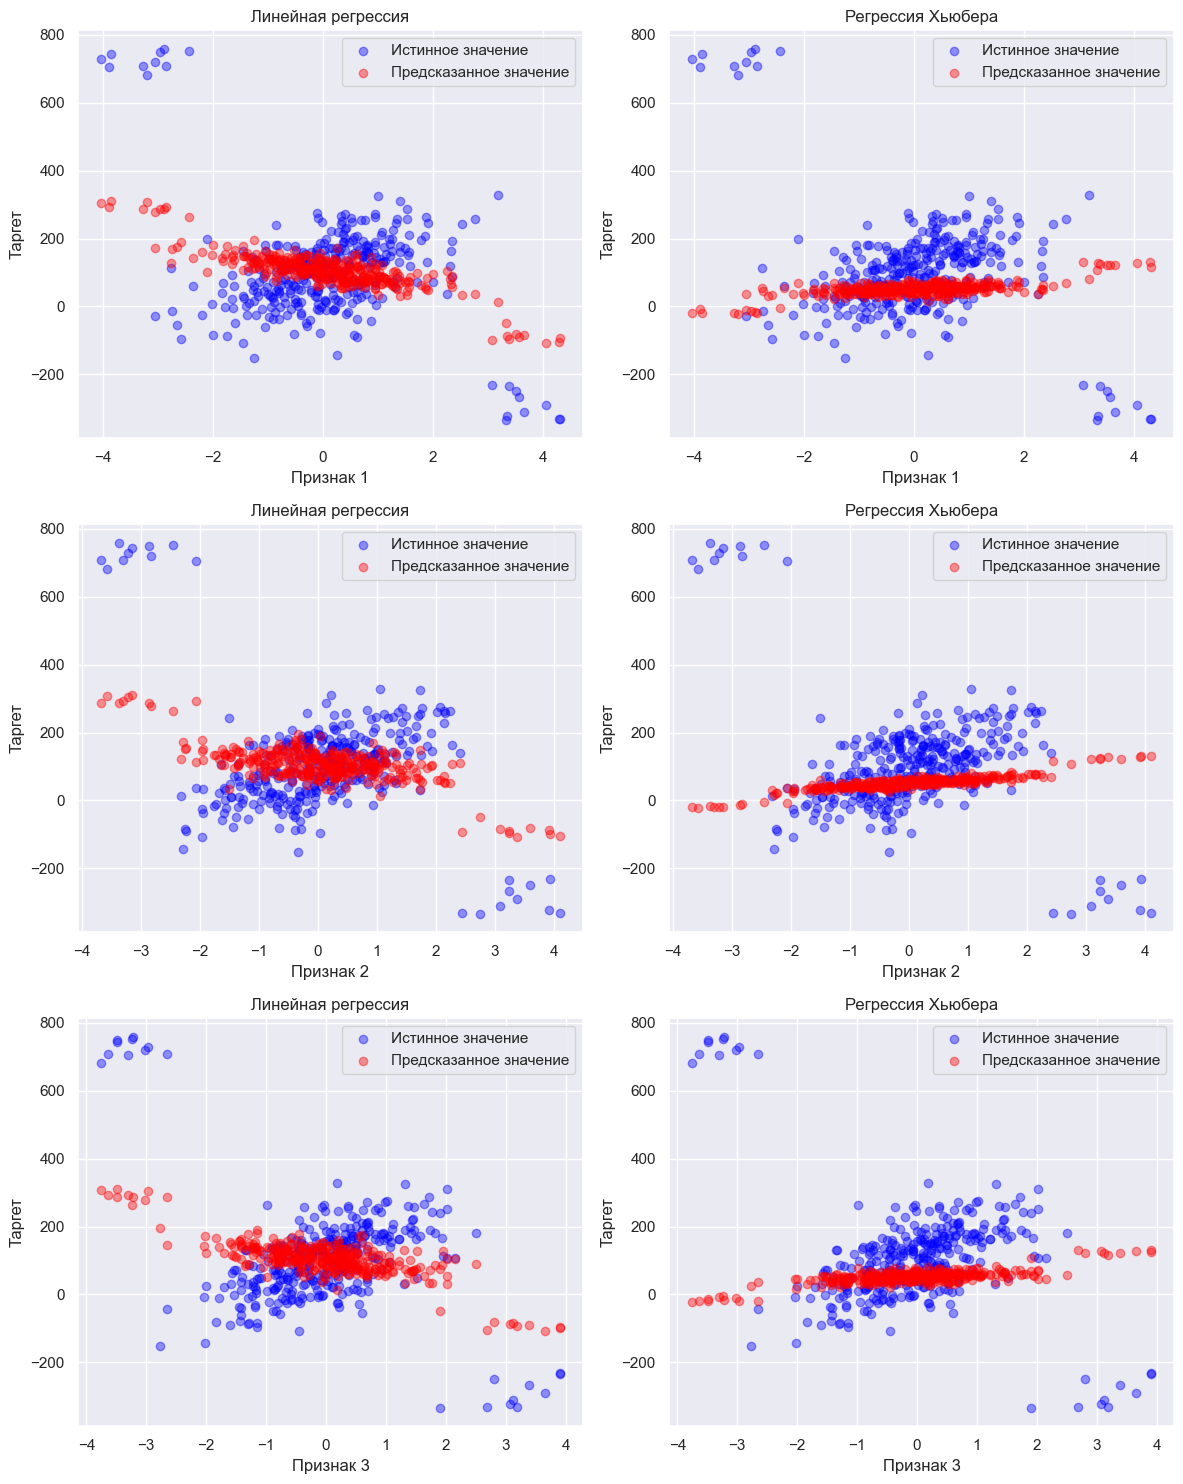

In [162]:
n_features = X_train.shape[1]
fig, axes = plt.subplots(n_features, 2, figsize=(12, 5 * n_features))
for i in range(n_features):
    axes[i, 0].scatter(X_train[f"feature_{i + 1}"].values, y_train, color='blue', label='Истинное значение',alpha=0.4)
    axes[i, 0].scatter(X_train[f"feature_{i + 1}"].values, lin_pred, color='red', label='Предсказанное значение', alpha=0.4)
    axes[i, 0].set_xlabel(f'Признак {i+1}')
    axes[i, 0].set_ylabel('Таргет')
    axes[i, 0].set_title('Линейная регрессия')
    axes[i, 0].legend()

    axes[i, 1].scatter(X_train[f"feature_{i + 1}"].values, y_train, color='blue', label='Истинное значение', alpha=0.4)
    axes[i, 1].scatter(X_train[f"feature_{i + 1}"].values, huber_pred, color='red', label='Предсказанное значение', alpha=0.4)
    axes[i, 1].set_xlabel(f'Признак {i+1}')
    axes[i, 1].set_ylabel('Таргет')
    axes[i, 1].set_title('Регрессия Хьюбера')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

**Вывод:** <...>